## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [9]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
#將物件轉為數值標籤
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
#補充: 將365243取代為nan
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# also apply to testing dataset
#補充: 將365243取代為nan
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
#補充: 生日取絕對值
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [10]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False
5,100008,0,0,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,False
6,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,0,False
7,100010,0,0,1,1,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,0,False
8,100011,0,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,0,True
9,100012,0,1,0,1,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,0,False


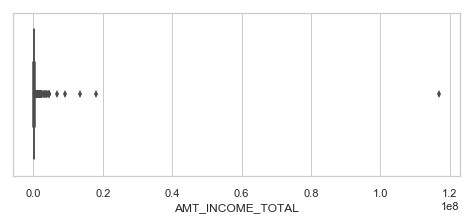

In [26]:
import seaborn as sns
plt.figure(figsize=(8, 3))
sns.set(style="whitegrid")
ax = sns.boxplot(x=app_train['AMT_INCOME_TOTAL'],)

In [41]:
x=app_train[app_train['AMT_INCOME_TOTAL']<0.2e8]['AMT_INCOME_TOTAL']
y=app_train[app_train['AMT_INCOME_TOTAL']<0.2e8]['AMT_CREDIT']

(0, 2500000.0)

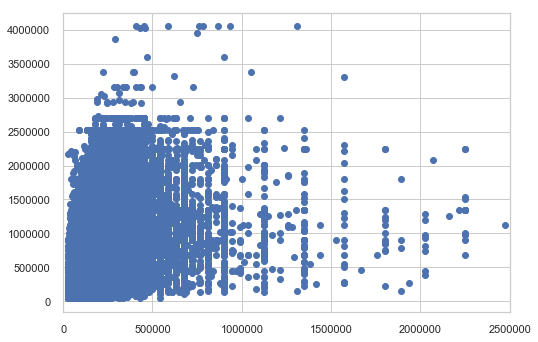

In [42]:
plt.scatter(x=x,y=y)
plt.xlim(0,0.25e7)